# Python勉強会(3)<a id='top'></a>

###  目次
1. [単回帰分析](#sec1)
2. [重回帰分析](#sec2)

今回は、回帰分析を行います！いよいよ、勉強会も後半に突入です。

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols  # 回帰分析のパッケージ
from see import see  # 属性を調べるパッケージ

**単回帰分析**  <a id='sec1'></a>  
[先頭に戻る](#top)  

**単回帰分析**  
ある変数XとYが存在し、それら二つの変数に何らかの関係が存在することが仮定できるとき、もっとも簡単に$Y = \alpha + \beta X$と書けます。  このモデルは、Xが決定すると、Yも一意に定まるので、決定的モデルと言われます。  
これを現実の現象で考えてみましょう。  

例えば、鉄には熱によって膨張するという性質(熱膨張)が備わっています。  鉄道会社に勤めるAさんは、気温と熱の関係を調べるように要請されました。そこで、資料を確認すると、下の図と散布図が載っていました。

   heat  length
0    10    1001
1    15    1005
2    20    1007
3    25    1007
4    30    1012


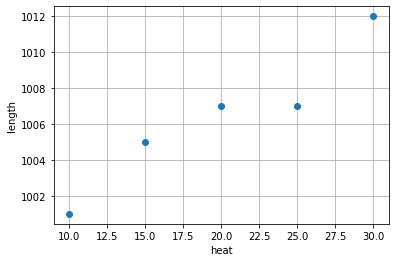

In [4]:
list = [[10,1001],[15,1005],[20,1007],[25,1007],[30,1012]]
df = pd.DataFrame(list)
df.columns=['heat', 'length']
print(df)
plt.plot(df['heat'],df['length'],"o")
plt.xlabel("heat")
plt.ylabel("length")
plt.grid(True)
pass

ある程度、一直線の関係が存在しているように思えます。そこで、Aさんは先ほどの式、$Y = \alpha + \beta X$を思い出し、当てはめてみようと考えました。しかし、Aさんは次のことに思い当たりました。  
「たしかに、この散布図は一直線のようにも見えるけど、正確には一直線ではないな。もしかしたら、測るときに誤差が生じているのかもしれない。」

この考えに基づき、先ほどの決定的モデルに"誤差$u$"を加えた式が、分析の際に一般に使われます。  
$Y = \alpha + \beta X + u$  
この式を、確率モデルといいます。

この式について、さらに見ていきます。  
$\alpha$が特定の値、$\acute{\alpha}$を取るとき、$\beta$は、$\acute{\beta}$をとります。  
$Y = \acute{\alpha} + \acute{\beta}X + \acute{u}$  
この式を変形すると、  
$\acute{u} = Y - \acute{\alpha} - \acute{\beta}X $    
この$\acute{u}$のことを残差と言います。  
そして、この残差の二乗した残差二乗和を最小化する$\alpha$,$\beta$を求める方法を**最小二乗法**と言います。

ここからは、ビールの消費量と気候の関係性について分析します。
**リサーチクエスチョン**  
気温が高い地域では、ビールの消費量が増えるか。  
$Y = \acute{\alpha} + \acute{\beta}X + \acute{u}$  
$Y$:ビールの消費量,$X$:気候

平成30年度分 酒税課税関係等状況表:https://www.nta.go.jp/taxes/sake/tokei/kazeikankei2018/01.htm 

In [120]:
df0 = pd.read_csv("ビールExcel.csv")
df0.head()

,prefecture,beer
0,北海道,"113,097"
1,青森,"23,177"
2,岩手,"24,879"
3,宮城,"43,152"
4,秋田,"19,229"


In [121]:
df1 = pd.read_csv("seijin.csv",thousands=',')
df1 = df1.drop(index=0).reset_index(drop=True)
df1 = df1.rename(columns={'Unnamed: 0': 'prefecture',"Unnamed: 1":"性別" ,'Unnamed: 2': 'adult'})
df1 = df1[::3].reset_index(drop=True)
df1["prefecture"] = df1["prefecture"].str[:-2]
df1 = df1.replace({'茨':'茨城','北海':'北海道'})
df1 = df1.drop(index = [46],columns=['性別'])
df1.head()

,prefecture,adult
0,北海道,"4,509,363"
1,青森,"1,103,183"
2,岩手,"1,059,293"
3,宮城,"1,915,548"
4,秋田,"868,937"


In [122]:
df_pre_beer = pd.merge(df0,df1,how="inner")
df_pre_beer.head()

,prefecture,beer,adult
0,北海道,"113,097","4,509,363"
1,青森,"23,177","1,103,183"
2,岩手,"24,879","1,059,293"
3,宮城,"43,152","1,915,548"
4,秋田,"19,229","868,937"


In [111]:
df_pre_beer["beer"]=df_pre_beer["beer"].str.replace(',','')
df_pre_beer["adult"] = df_pre_beer["adult"].str.replace(',','')
df_pre_beer['beer'] = df_pre_beer['beer'].astype(int)
df_pre_beer['adult'] = df_pre_beer['adult'].astype(int)
df_pre_beer["thou"] = 1000
df_pre_beer["beer"] = df_pre_beer["beer"]*df_pre_beer["thou"]
df_pre_beer["per_beer"] = df_pre_beer["beer"] / df_pre_beer["adult"]
df_pre_beer.head()

,prefecture,beer,adult,thou,per_beer
0,北海道,113097000,4509363,1000,25.080483
1,青森,23177000,1103183,1000,21.009207
2,岩手,24879000,1059293,1000,23.486420
3,宮城,43152000,1915548,1000,22.527235
4,秋田,19229000,868937,1000,22.129337


In [112]:
df_new = df_pre_beer[["prefecture","per_beer"]]
df_new.head()

,prefecture,per_beer
0,北海道,25.080483
1,青森,21.009207
2,岩手,23.486420
3,宮城,22.527235
4,秋田,22.129337


In [113]:
#グラフの名前を日本語で表示するライブラリ
!pip install japanize-matplotlib
import japanize_matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl


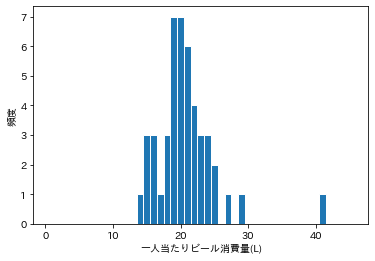

In [114]:
plt.hist(df_new["per_beer"],bins = np.arange(46)+0.5,ec = "white")
plt.xlabel("一人当たりビール消費量(L)")
plt.ylabel("頻度")
plt.show()
pass

In [117]:
df_tmp = pd.read_csv("年平均気温.csv")
df_tmp["prefecture"] = df_tmp["prefecture"].str[:-1]
df_tmp = df_tmp.replace({'北海':'北海道'})
df_tmp.drop(index = [46])
df_tmp.head()

,prefecture,ave_temp
0,北海道,9.5
1,青森,11.0
2,岩手,11.0
3,宮城,13.6
4,秋田,12.3


In [118]:
df_ok = pd.merge(df_new,df_tmp,how="inner")
df_ok.head()

,prefecture,per_beer,ave_temp
0,北海道,25.080483,9.5
1,青森,21.009207,11.0
2,岩手,23.486420,11.0
3,宮城,22.527235,13.6
4,秋田,22.129337,12.3


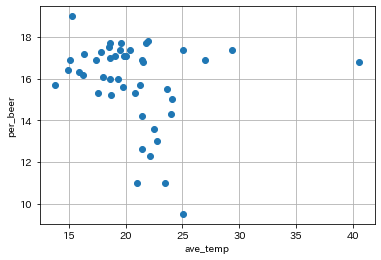

In [125]:
#散布図を描くための下準備
%matplotlib inline
import matplotlib.pyplot as plt

#図に使う変数の設定
plt.plot(df_ok['per_beer'],df_ok['ave_temp'],"o")

#軸の名前を設定
plt.xlabel("ave_temp")
plt.ylabel("per_beer")

#メモリを入れる
plt.grid(True)
pass

**回帰分析**

In [127]:
y,x = df_ok['per_beer'],df_ok['ave_temp']

In [128]:
#statsmodels
formula = 'y ~ x'
mod = ols(formula, data=df_ok)
res = ols(formula, data=df_ok).fit()
res.params
#ols 最小二乗法

Intercept    27.378108
x            -0.422595
dtype: float64

$Y = \acute{\alpha} + \acute{\beta}X + \acute{u}$より、  
$Y = 27.378108 + -0.422595X + u$

In [129]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.735
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.195
Time:                        18:46:20   Log-Likelihood:                -132.09
No. Observations:                  46   AIC:                             268.2
Df Residuals:                      44   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3781      5.131      5.336      0.0

R-squared:決定係数:
$R^2 = 1-　\displaystyle \frac{\Sigma\hat{{u_i}^2}}{\Sigma({y_i}-\overline{y})^2}$  
$0 \leqq R^2 \leqq 1$  

std error:標準誤差

In [27]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3781      5.131      5.336      0.000      17.038      37.719
x             -0.4226      0.321     -1.317      0.195      -1.069       0.224


1. やってみよう！

資料ダウンロード用URL  
http://www.yuhikaku.co.jp/static/studia_ws/index.html#isbn_9784641150287  
『計量経済学の第一歩 -- 実証分析のススメ』  
5　例題と練習問題で利用したデータ（csv形式，dta形式）[ZIP: 374KB]  
**方法**  
ファイルをダウンロードしたら解凍して、5_1_income.csvをjupyter notebookにアップロード

In [106]:
df_task1 = pd.read_csv("5_1_income.csv")
df_task1

,yeduc,income,lincome,lyeduc
0,9,100.0,4.605170,2.197225
1,9,50.0,3.912023,2.197225
2,9,150.0,5.010635,2.197225
3,9,200.0,5.298317,2.197225
4,9,150.0,5.010635,2.197225
...,...,...,...,...
4322,18,850.0,6.745236,2.890372
4323,18,700.0,6.551080,2.890372
4324,18,650.0,6.476973,2.890372
4325,18,650.0,6.476973,2.890372


**データ説明**  
yeduc:修学年数  
income:年収(万円)  
lincome:年収の対数値  
lyeduc:修学年数の対数値

このデータを使って、  
$Y = \beta_0 + \beta_1X + U$  
Y:年収,X:修学年数の単回帰分析を行ってみましょう。

## 重回帰分析  <a id='sec1'></a>  
[先頭に戻る](#top)  

In [75]:
import numpy as np
from scipy.stats import norm, uniform, gaussian_kde, multivariate_normal
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
from see import see
from sklearn.model_selection import train_test_split

In [72]:
df_multi = pd.read_csv("7_1_income.csv")
df_multi

,female,yeduc,lincome,female_yeduc
0,0,9,4.605170,0
1,0,9,5.010635,0
2,0,9,4.605170,0
3,0,9,5.010635,0
4,0,9,5.329089,0
...,...,...,...,...
4281,1,18,6.396930,18
4282,1,18,6.396930,18
4283,1,18,6.551080,18
4284,1,18,6.396930,18


まづ、このモデルを当てはめてみる。  
$lincome = \beta_0 + \beta_1{yeduc} + \sigma_0{female} + U$

In [83]:
#被説明変数と説明変数を追加
formula_1 = "lincome ~ yeduc + female"

In [84]:
#fit()で関数に代入
res_1 = ols(formula_1,data = df_multi).fit()

In [86]:
#係数の推定値はparamsで習得可能
res_1.params

Intercept    4.863272
yeduc        0.058598
female      -0.832148
dtype: float64

In [88]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lincome   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     605.0
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.98e-232
Time:                        16:42:58   Log-Likelihood:                -5265.0
No. Observations:                4286   AIC:                         1.054e+04
Df Residuals:                    4283   BIC:                         1.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8633      0.096     50.593      0.000       4.675       5.052
yeduc          0.0586      0.007      8.696      0.000       0.045       0.072
female        -0.8321      0.025    -32.827      0.000      -0.882      -0.782
==============================================================================
Omnibus:                     1327.704   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.440
Skew:                          -1.594   Prob(JB):                         0.00
Kurtosis:                       6.562   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
df_multi2 = pd.read_csv("7_2_work.csv")
df_multi2

,childu6,income_s,mowork15,work
0,0,0.0,1,0
1,0,0.0,1,0
2,1,0.0,0,1
3,1,0.0,1,1
4,0,12.5,0,0
...,...,...,...,...
1048,1,1500.0,1,1
1049,1,1500.0,1,1
1050,0,2000.0,1,0
1051,0,2250.0,1,0


In [89]:
formula_2 = "lincome ~ yeduc + female + female_yeduc"

In [90]:
#fit()で関数に代入
res_2 = ols(formula_2,data = df_multi).fit()

In [91]:
#係数の推定値はparamsで習得可能
res_2.params

Intercept       5.346896
yeduc           0.024095
female         -2.079202
female_yeduc    0.090229
dtype: float64

In [92]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lincome   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     421.5
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          6.50e-240
Time:                        16:43:41   Log-Likelihood:                -5243.7
No. Observations:                4286   AIC:                         1.050e+04
Df Residuals:                    4282   BIC:                         1.052e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.3469      0.121     44.218      0.000       5.110       5.584
yeduc            0.0241      0.009      2.824      0.005       0.007       0.041
female          -2.0792      0.192    -10.807      0.000      -2.456      -1.702
female_yeduc     0.0902      0.014      6.538      0.000       0.063       0.117
==============================================================================
Omnibus:                     1316.225   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4018.870
Skew:                          -1.582   Prob(JB):                         0.00
Kurtosis:                       6.535   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

重回帰分析において注意すべきこと  
多重共線性

**予測**

In [93]:
t = df_multi["lincome"].values
x = df_multi.drop(labels=["lincome"],axis = 1).values

In [94]:
#テストデータと訓練データの分割
x_train,x_test,t_train,t_test = train_test_split(x, t, test_size=0.3,random_state=0)

In [95]:
print(len(x_test))
print(len(x_train))

1286
3000


In [96]:
#アルゴリズムの宣言
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [97]:
#モデルに使用するデータを当てはめる。
model.fit(x_train,t_train)

LinearRegression()

In [102]:
#係数
model.coef_

array([-2.28530809,  0.02641009,  0.10565518])

In [99]:
#切片が確認できる。
model.intercept_

5.3190721788468185

In [103]:
#決定係数の表示
print(f"train score:{model.score(x_train,t_train)}")
print(f"test score:{model.score(x_test, t_test)}")

train score:0.2344087804351943
test score:0.21131738969368719


この予測の精度を高めることを目標する分野が機械学習です！
有名なモデルでは、決定木(ランダムフォレスト)があります。

In [134]:
from sklearn.datasets import load_boston
dataset  = load_boston()
x,t = dataset.data,dataset.target
columns = dataset.feature_names
df = pd.DataFrame(x, columns=columns)
df["Target"] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


この表の中から、Targetを被説明変数として、重回帰分析をしてみましょう。

In [135]:
#.valuesでnumpyになる
t = df["Target"].values
x = df.drop(labels=["Target"],axis = 1).values